# Visualize the significance of a node in classification task

## Imports

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Global variables

In [2]:
# olders = ["Control/Good", "Control/Wrong", "EtOH/Good", "EtOH/Wrong"]
# folders = ["EtOH/Good", "EtOH/Wrong", "Control/Good", "Control/Wrong"]
folders = ["EtOH/Good", "Control/Good"]
threshold = 60
dataset_type = "_high_"


keys_indexes = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]# np.linspace(0, 1, 11)

## Functions

In [3]:
def plot_histogram(count_node_values, name):
    lists = sorted(count_node_values.items())

    x, y = zip(*lists)
    x = list(x)
    y = list(y)

    plt.figure(figsize=(10, 7))

    plt.bar(x[0], y[0], width=0.08, color='b', align="edge")
    plt.bar(x[1:5], y[1:5], width=0.08, color='b', align="edge")
    plt.bar(x[5:10], y[5:10], width=0.08, color='r', align="edge")
    plt.bar(x[10], y[10], width=0.05, color='r', align='center')
    plt.xticks([s for s in x])

    plt.ylabel("Count")
    plt.xlabel("CAM value")


    plt.savefig(name)
    # plt.show()   

In [4]:
def plot_final_histogram(path_to_save, count_node_value, total_nr_examples):

    lists = count_node_value.items()

    x, y = zip(*lists)
    x = list(x)
    y = list(y)
    y = [k / total_nr_examples for k in y]

    plt.figure(figsize=(20, 10))

    plt.bar(x, y, width=0.5, color='b', align="center")
    plt.xticks([s for s in x])
    plt.yticks(np.arange(0, 2, step=0.10))

    plt.ylabel("Count")
    plt.xlabel("CAM value")

    plt.savefig(path_to_save)
    # plt.show()

## Reading data

In [5]:
average_folder_dict = {folder: [] for folder in folders}
total_nr_examples_per_folder = {folder: 0 for folder in folders}
for dir_idx in range(1, 11):
    print(dir_idx)
    for folder in folders:
        total_nr_examples = 0
        dir_path_files = "data/GRAPHSUM" + str(threshold) + dataset_type + "Control_EtOH/files/CAM_1D_vector_1/CAM_vector_0_" + str(dir_idx)
        dir_path_files = os.path.join(dir_path_files, folder)
        
        dir_path_save_files = "data/GRAPHSUM" + str(threshold) + dataset_type + "Control_EtOH/files/CAM_1D_vector_1/CAM_vector_0_" + str(dir_idx)
        dir_path_save_files = os.path.join(dir_path_save_files, folder, "Nodes")
        
        dir_path_save = "data/GRAPHSUM"+ str(threshold) + dataset_type +"Control_EtOH/figures/CAM_1D_vector_1/CAM_vector_0_" + str(dir_idx)
        dir_path_save = os.path.join(dir_path_save, folder, "Nodes")
        
        dirs = os.listdir(dir_path_files)
        cam_dirs = {}
        nodes_dirs = []
        for filename in dirs:
            if "nodes" in filename:
                nodes_dirs.append(filename)
            if "cam" in filename and not "pred" in filename and not "png" in filename:
                if "Wrong" in folder:
                    _,_, nr_example = filename.split("_")
                    nr_example, _ = nr_example.split(".")
                else:
                    _, nr_example = filename.split("_")
                    nr_example, _ = nr_example.split(".")
                cam_dirs.update({int(nr_example):filename})
                
        total_nr_examples+= len(nodes_dirs)
                
        final_dicts = {}
        for node_index in range(0, 85):
            count_node_values = {key: 0 for key in keys_indexes}
            for nodes_file in nodes_dirs:
                if "Wrong" in folder:
                    _,_, nr_example = nodes_file.split("_")
                    nr_example, _ = nr_example.split(".")
                else:
                    _, nr_example = nodes_file.split("_")
                    nr_example, _ = nr_example.split(".")
                cam_file = cam_dirs[int(nr_example)]
                path_read_cam = os.path.join(dir_path_files, cam_file)
                path_read_nodes = os.path.join(dir_path_files, nodes_file)
                cam = np.loadtxt(path_read_cam)
                nodes = np.loadtxt(path_read_nodes, dtype=int)
                k = 0
                for k in range(0, len(cam)):
                    if node_index in nodes[k]:
                        key = round(int(cam[k] * 10) * 0.1, 1)
                        count_node_values[key] = count_node_values[key] + 1
            final_dicts.update({str(node_index + 1): count_node_values})
            filename = str(node_index + 1) + ".png"
            if not os.path.exists(dir_path_save):
                os.mkdir(dir_path_save)
            path_to_save = os.path.join(dir_path_save, filename)
            # plot_histogram(count_node_values, path_to_save)
        
        indexes_list = []
        for idx in keys_indexes:
            final_dicts_sorted = sorted(final_dicts.items(), key=lambda k_v: k_v[1][idx])
            count_node_value_idx = {}
            for elem in final_dicts_sorted:
                count_node_value_idx.update({int(elem[0]): elem[1][idx]})
            filename = "node_count_relative_" + str(idx) + ".png"
            path_to_save = os.path.join(dir_path_save, filename)
            # plot_final_histogram(path_to_save, count_node_value_idx, len(nodes_file))
            indexes_list.append(count_node_value_idx)
            
            dict_to_write = np.empty((85,2))
            k = 0
            for key, value in count_node_value_idx.items():
                dict_to_write[k, :] = (key, value) 
                k += 1
            filename = "nodes_count_absolute_" + str(idx) + ".txt"
            if not os.path.exists(dir_path_save_files):
                os.mkdir(dir_path_save_files)
            path_to_save = os.path.join(dir_path_save_files, filename)
            np.savetxt(path_to_save, dict_to_write, "%d")
        average_folder_dict[folder].append(indexes_list)
        total_nr_examples_per_folder[folder]+=total_nr_examples

1
2
3
4
5
6
7
8
9
10


EtOH/Good
Control/Good


/home/ldp/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


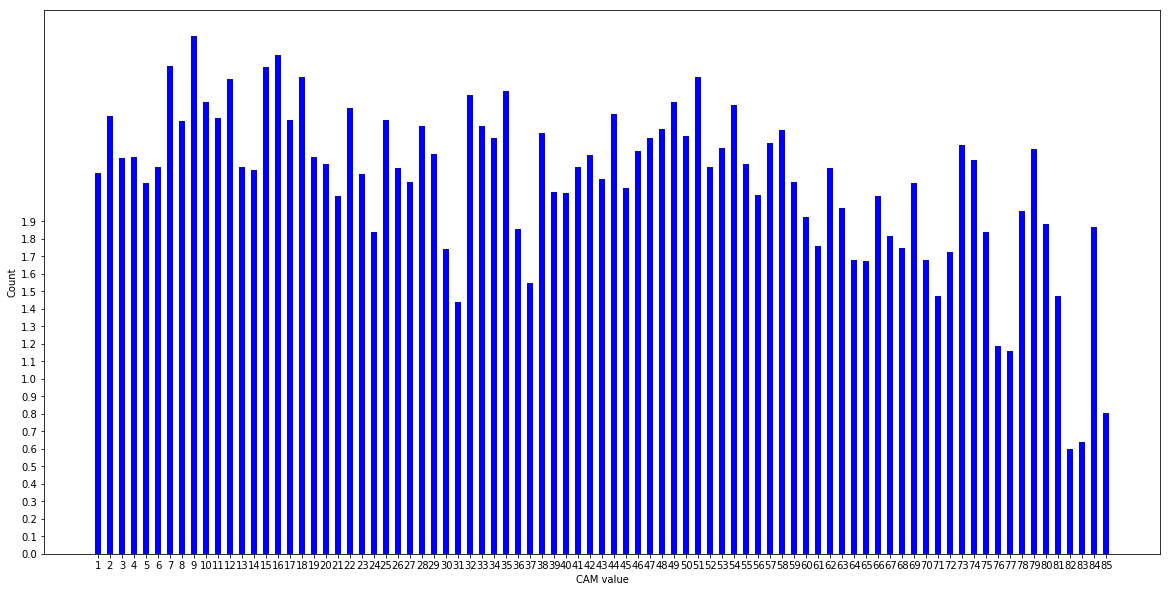

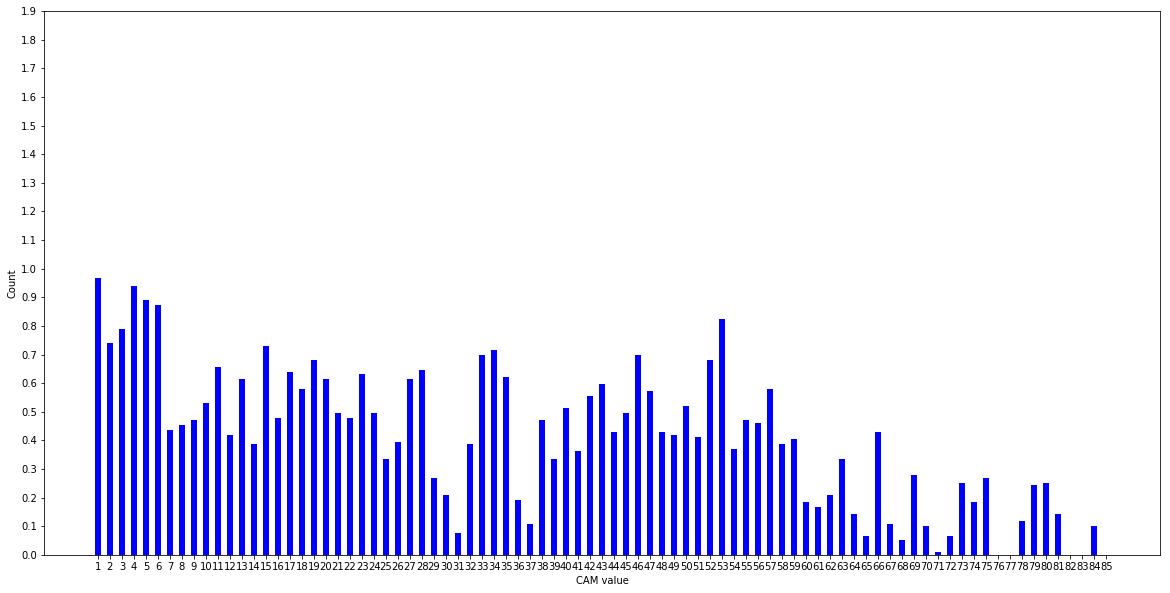

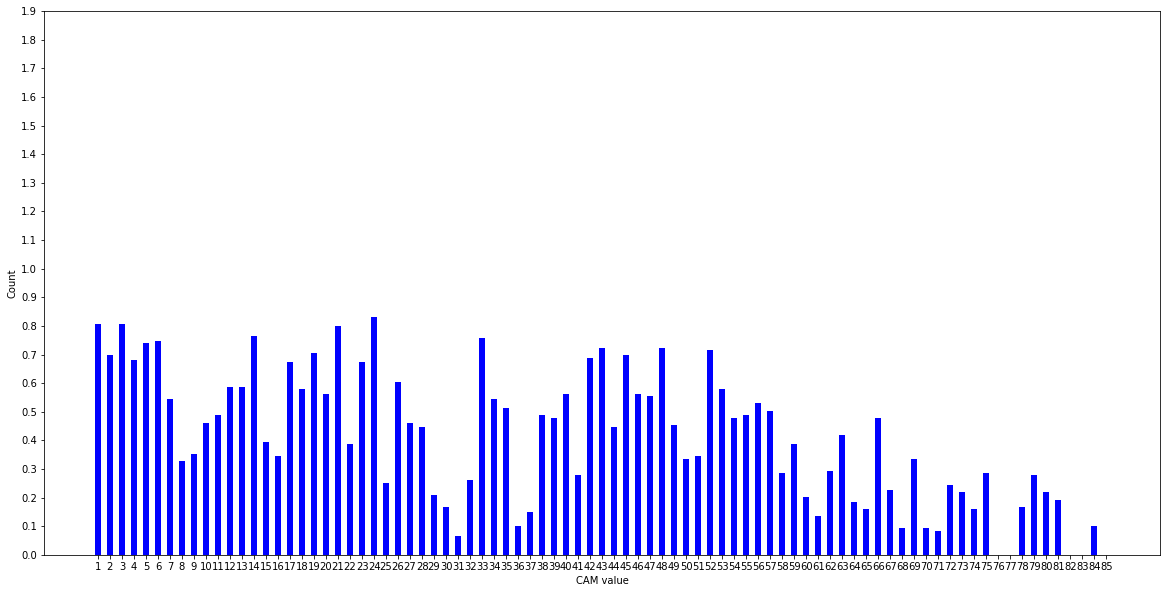

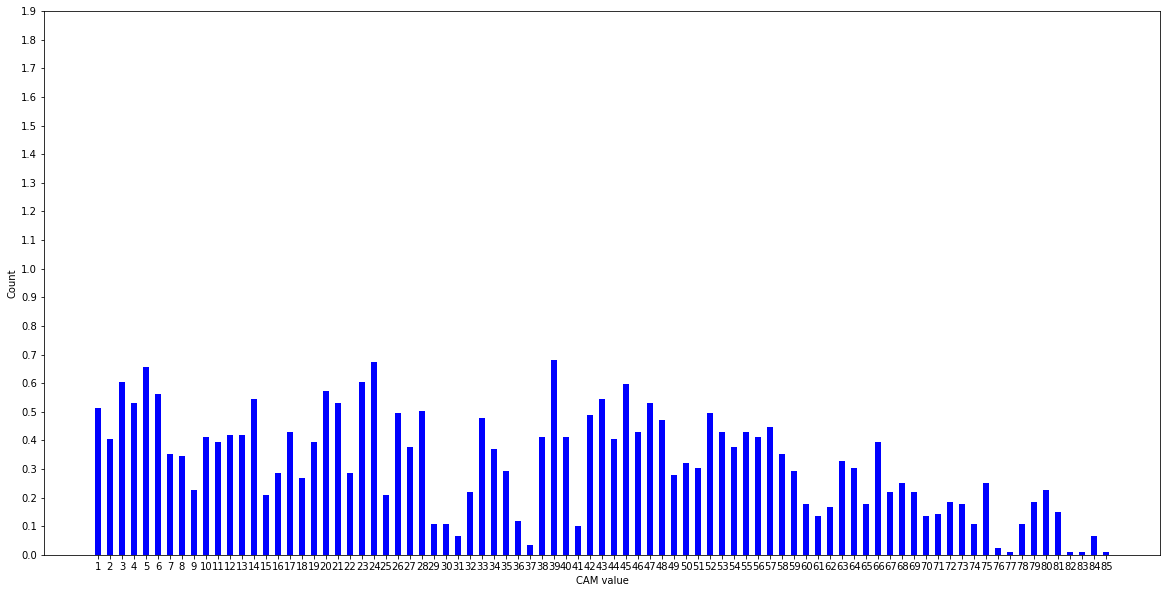

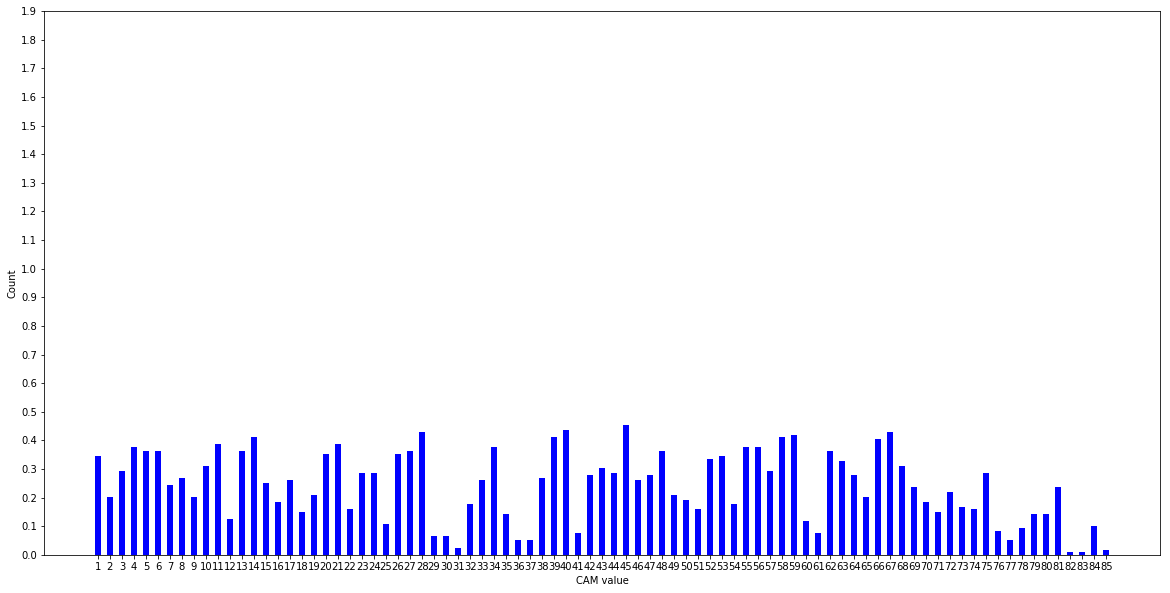

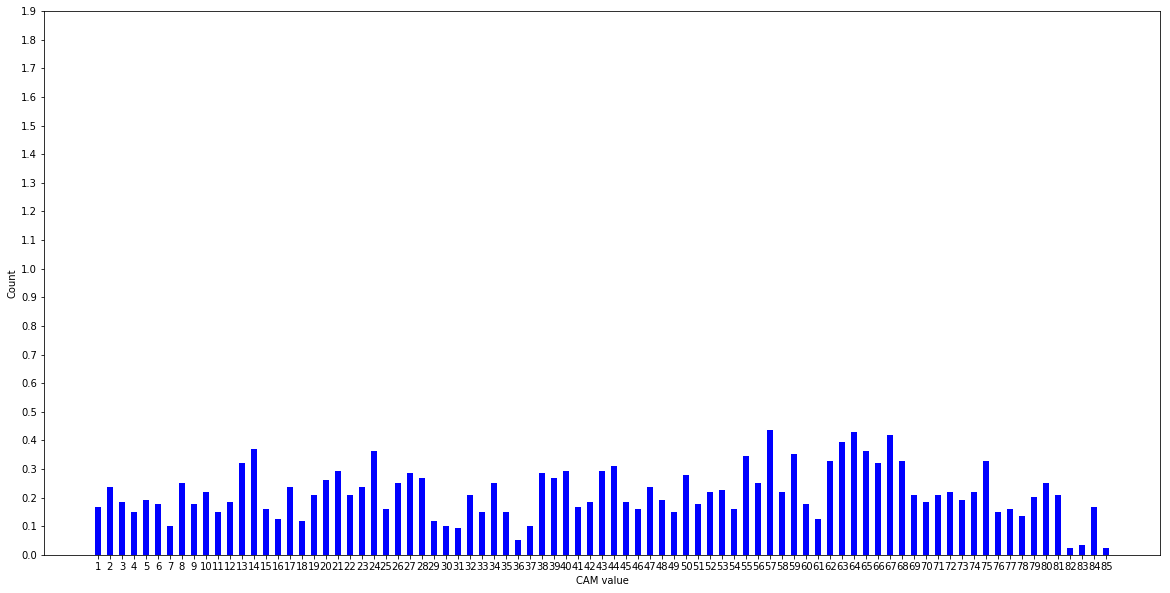

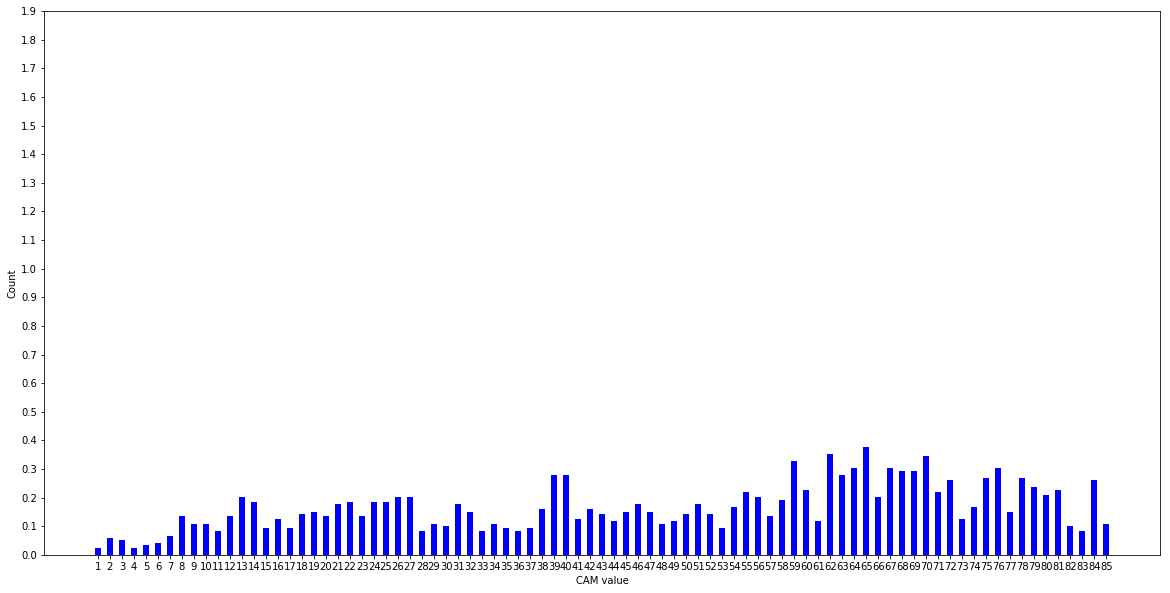

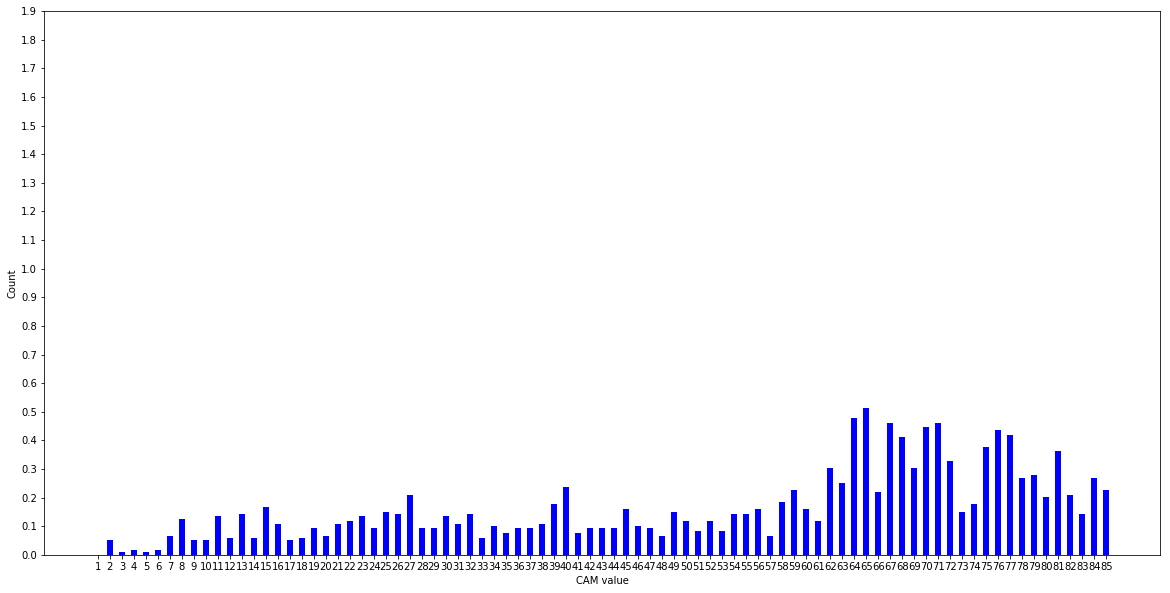

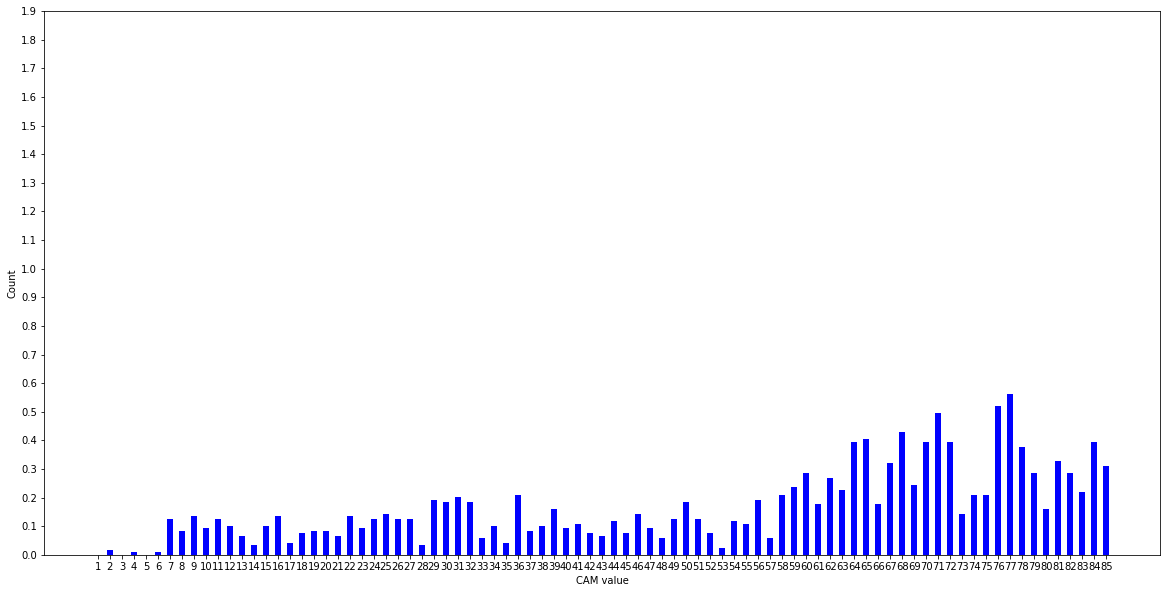

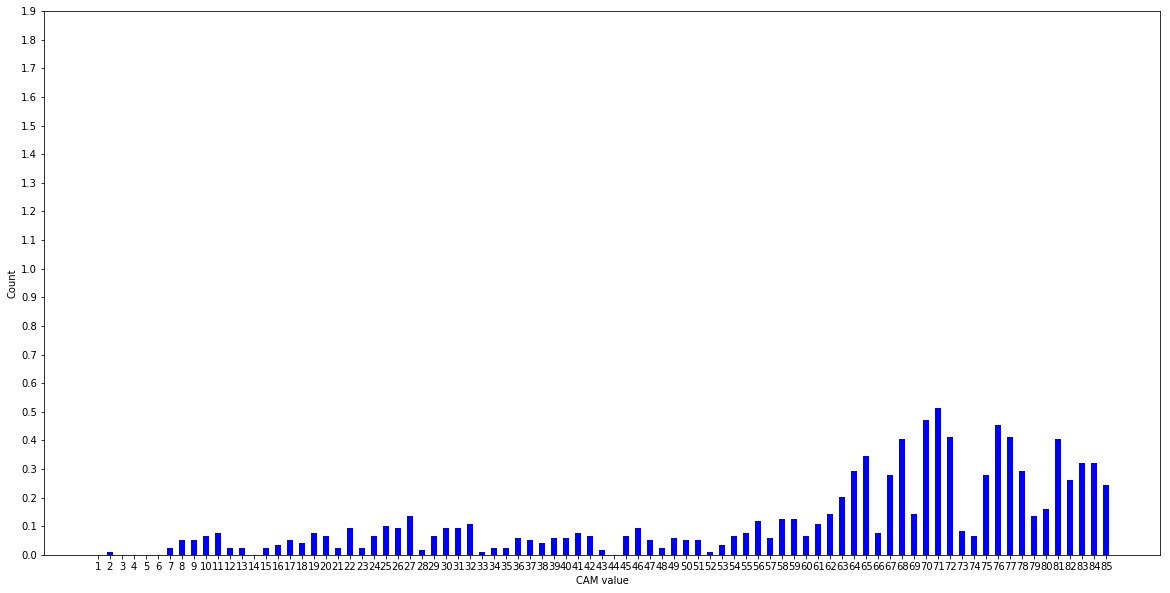

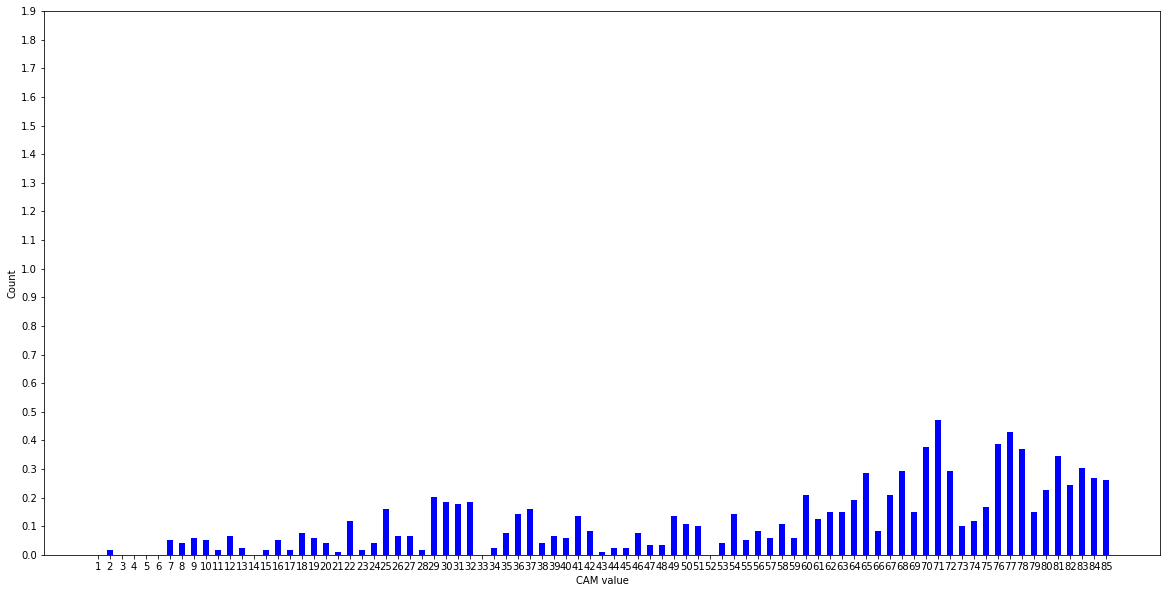

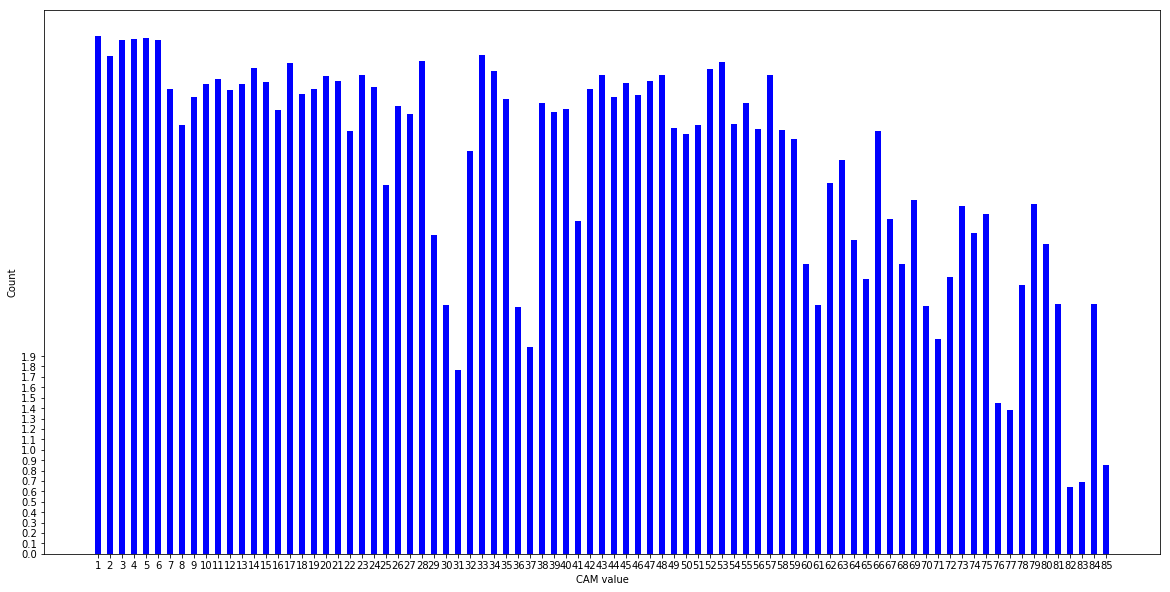

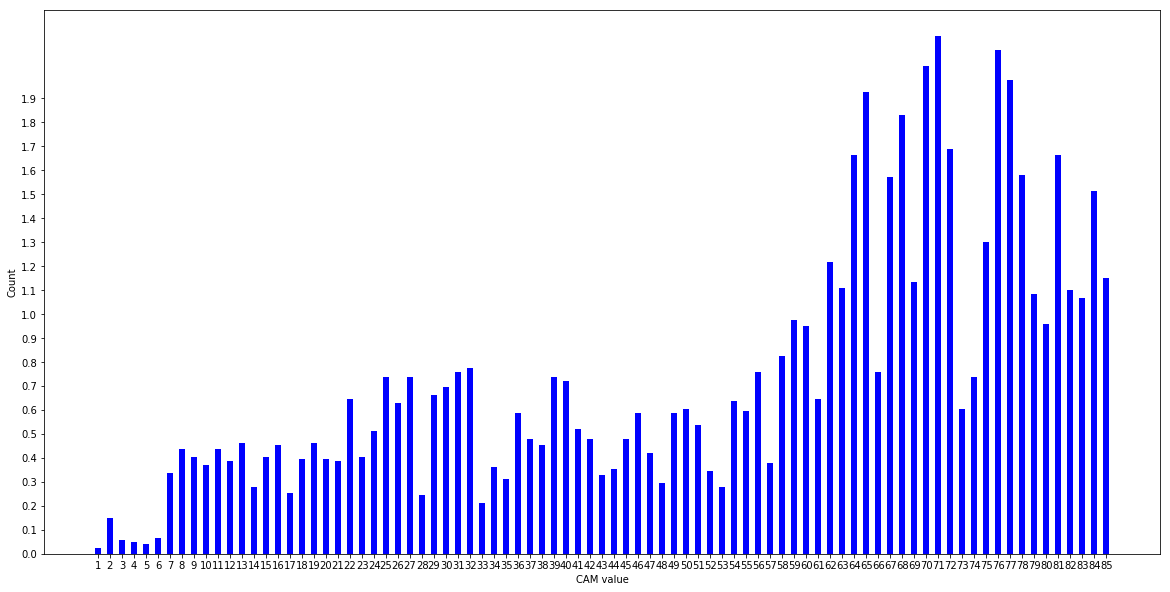

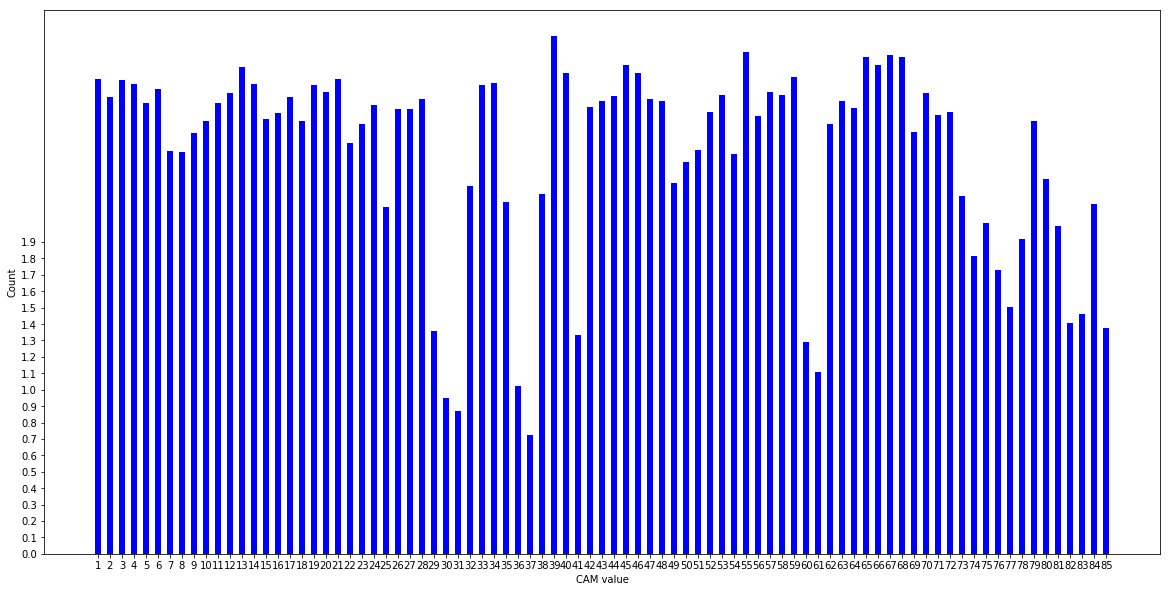

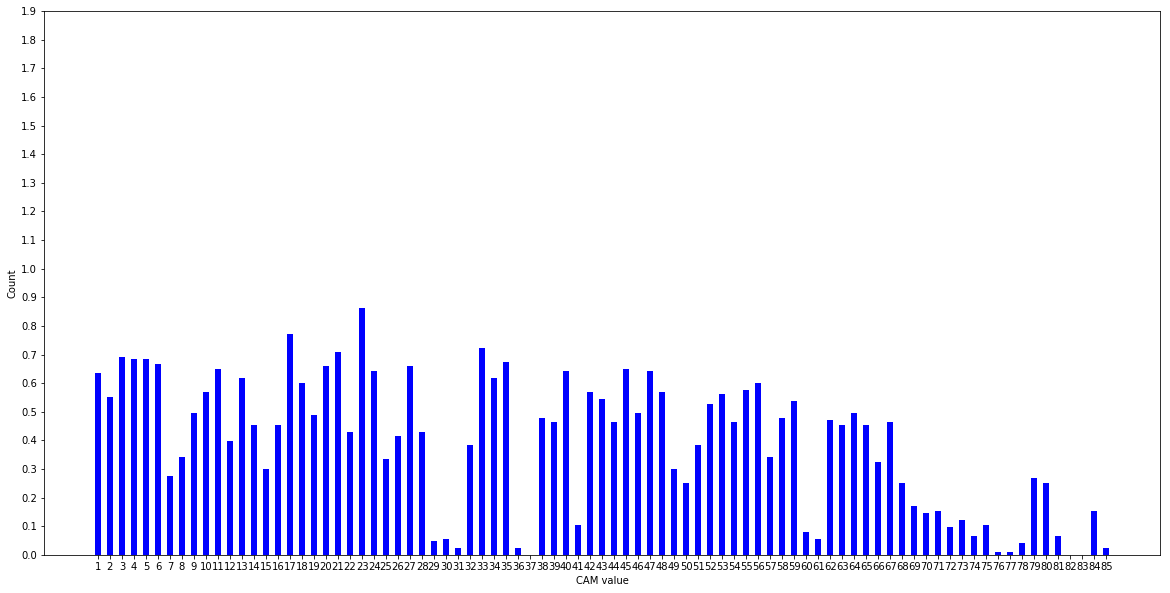

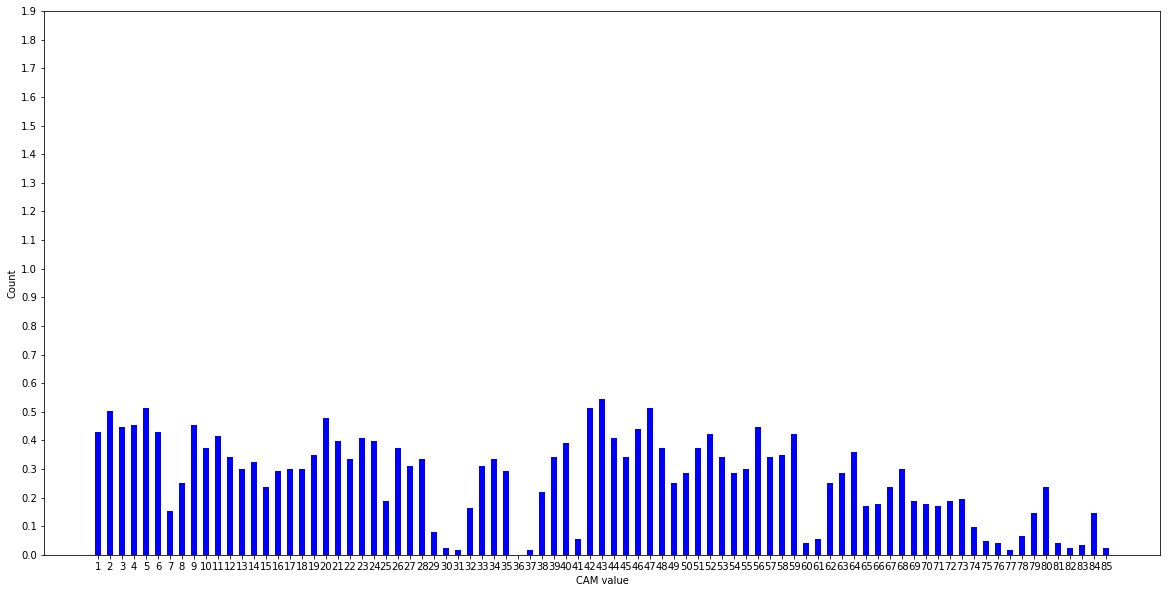

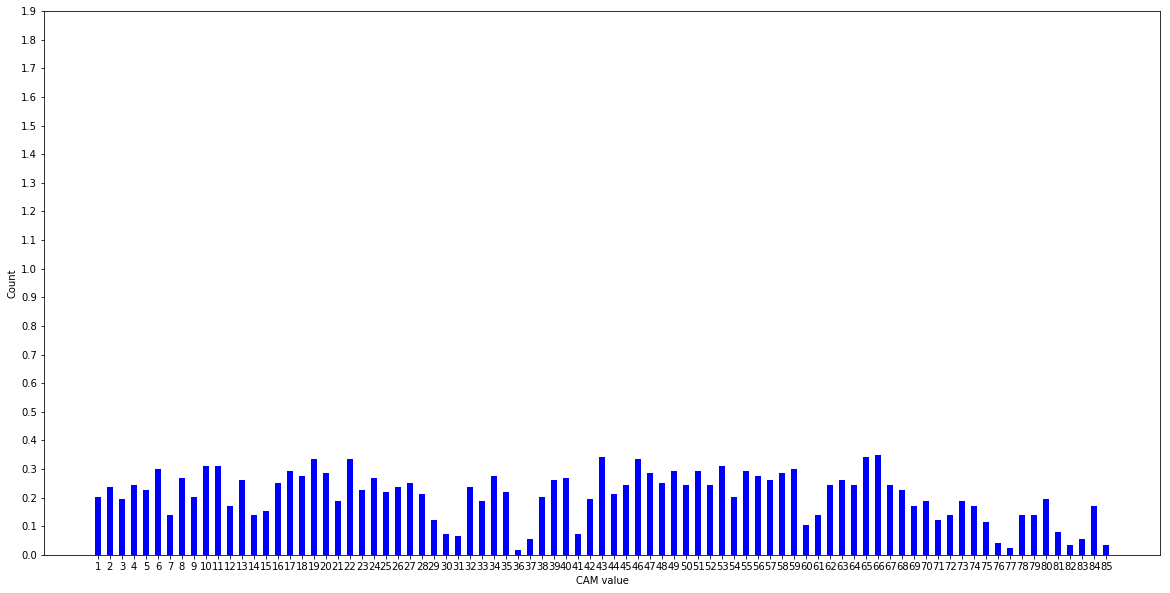

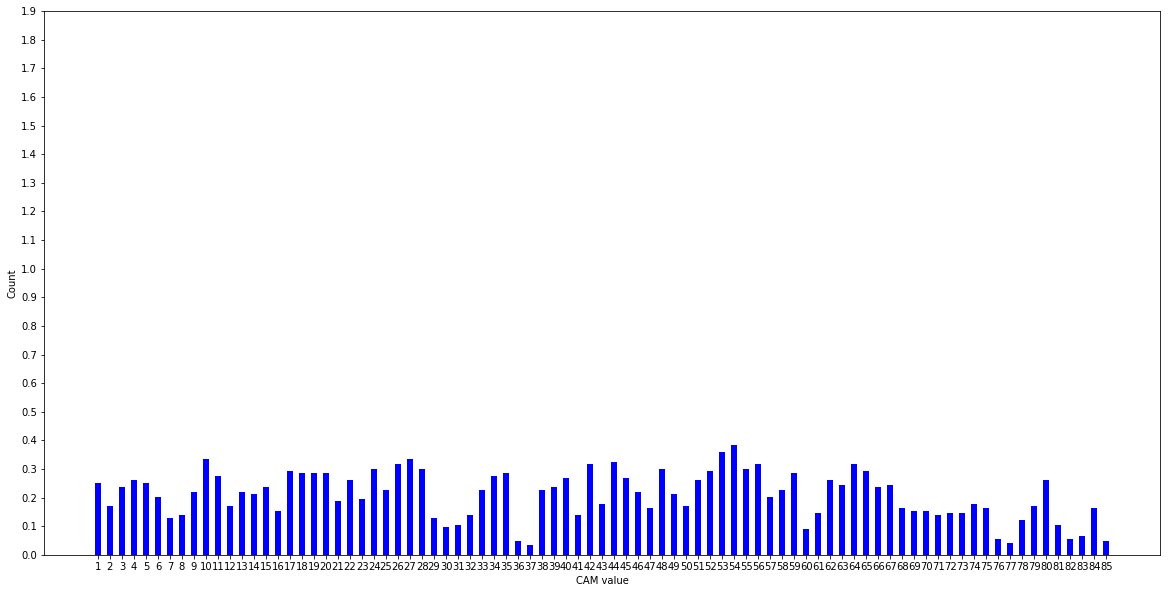

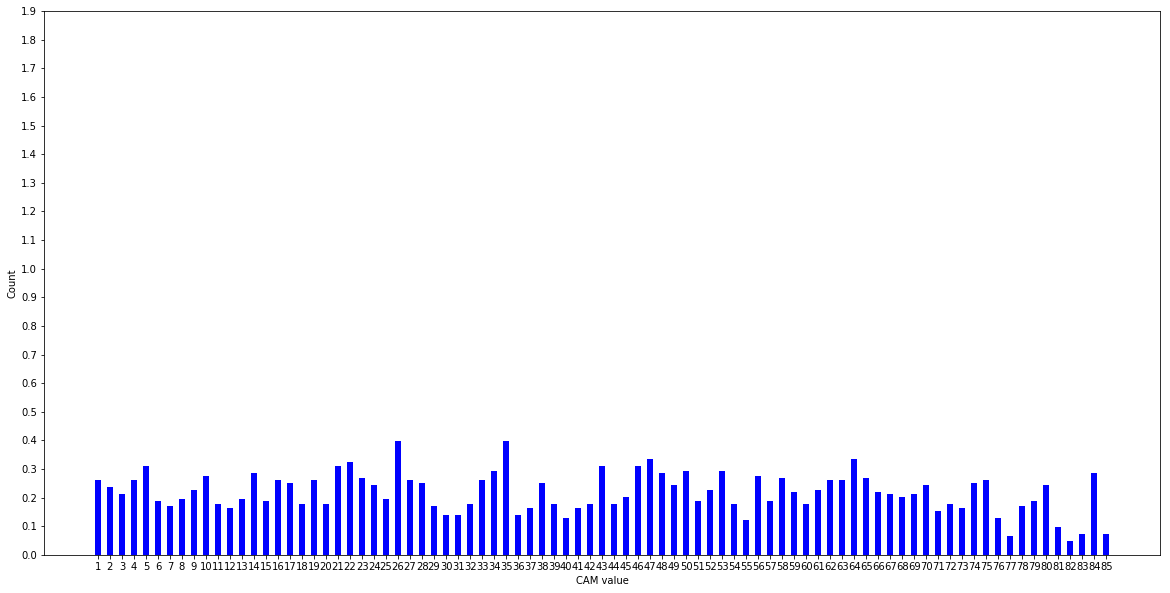

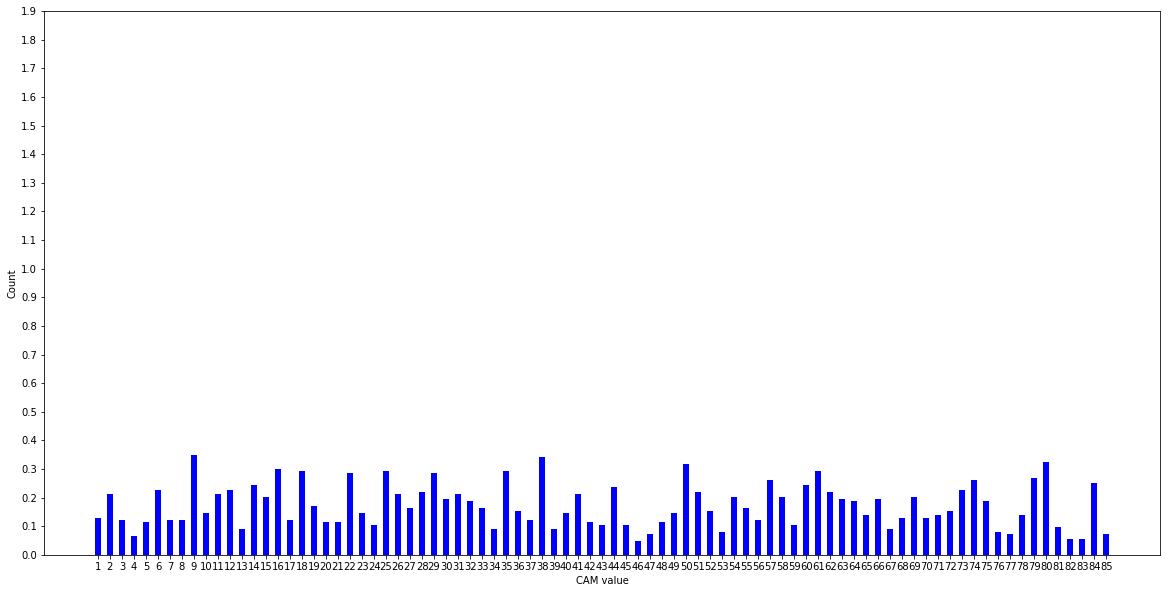

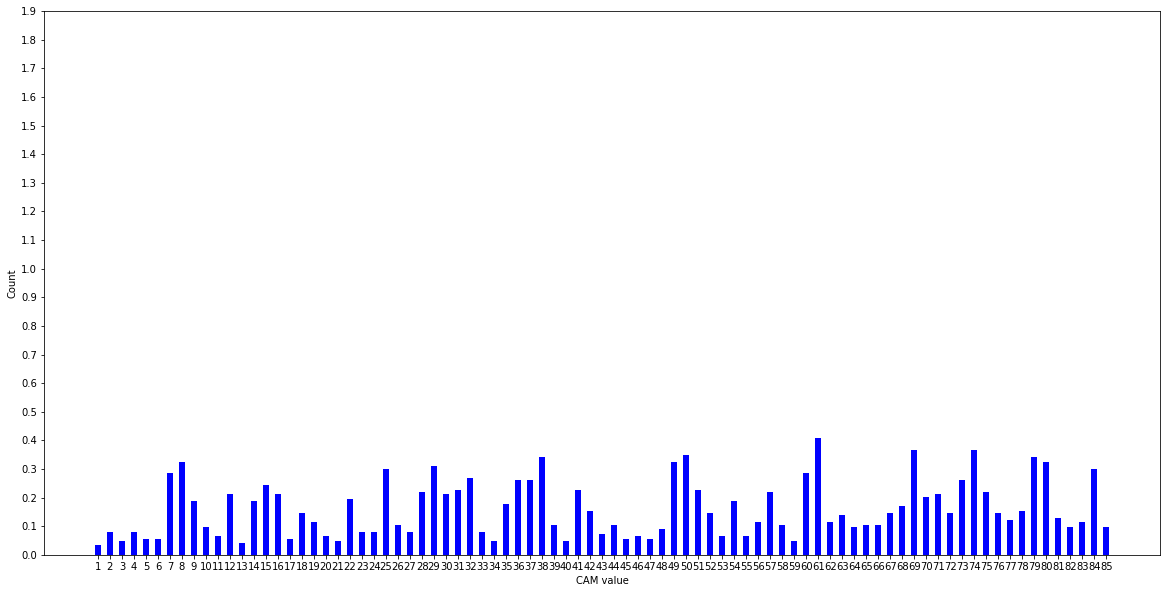

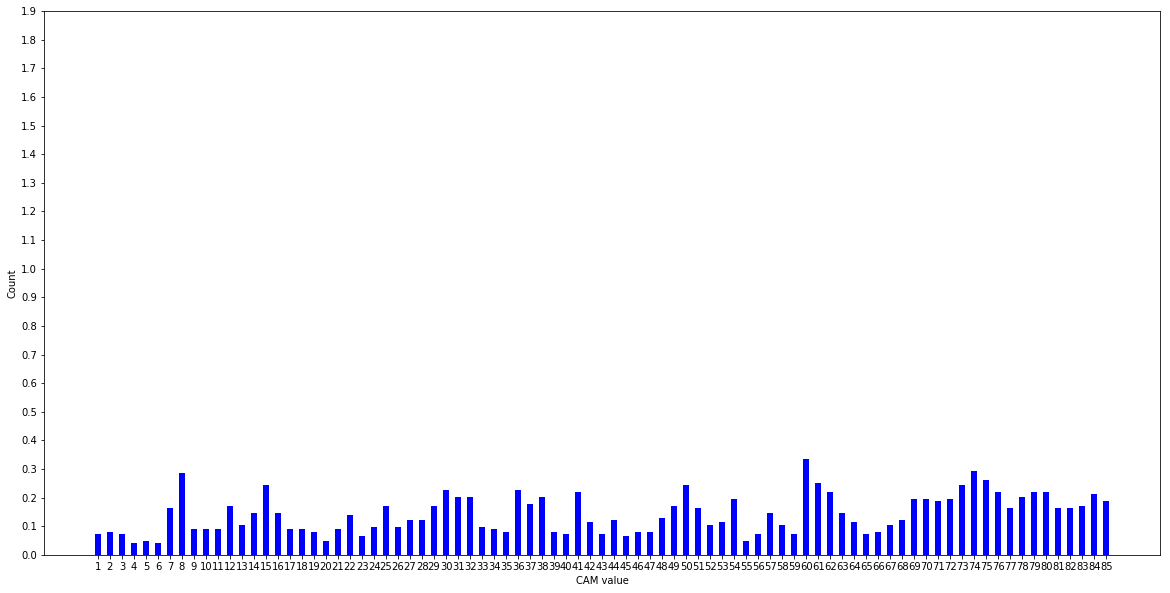

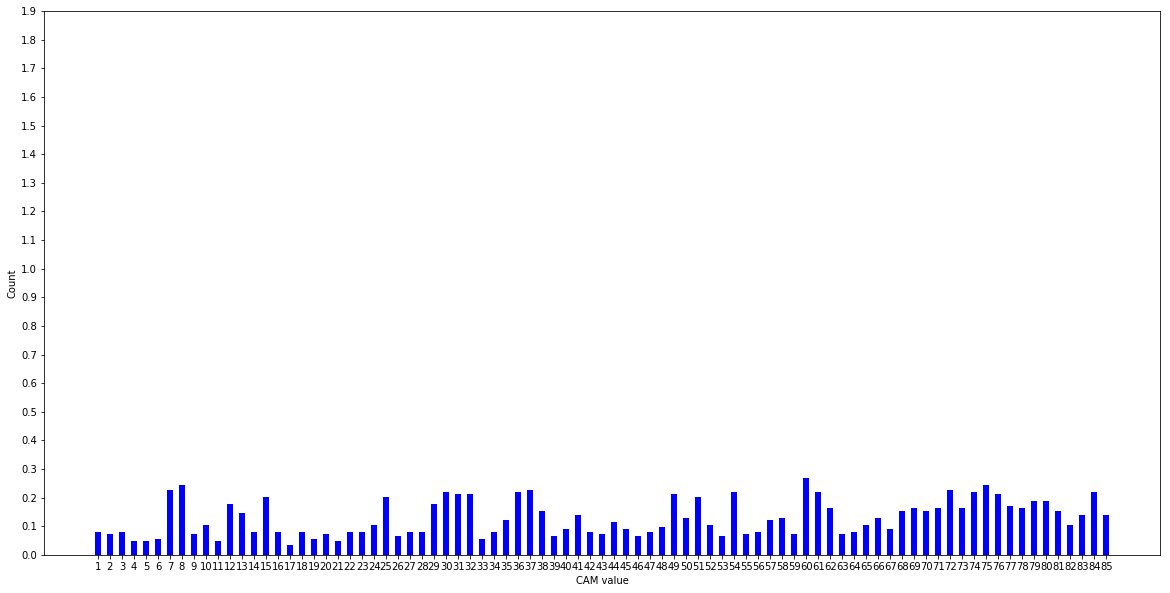

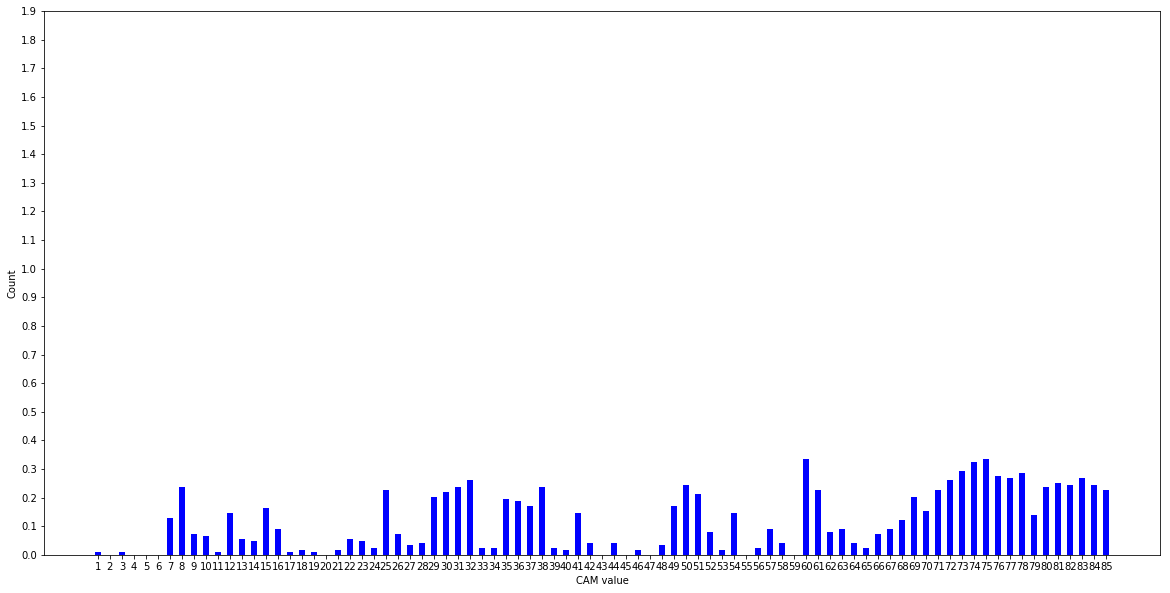

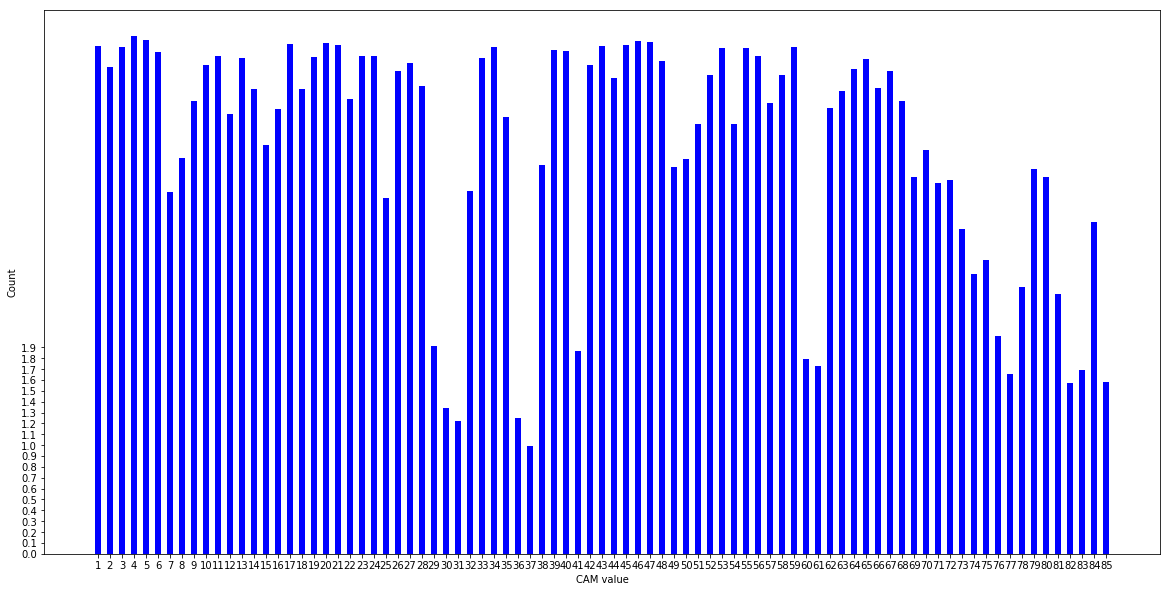

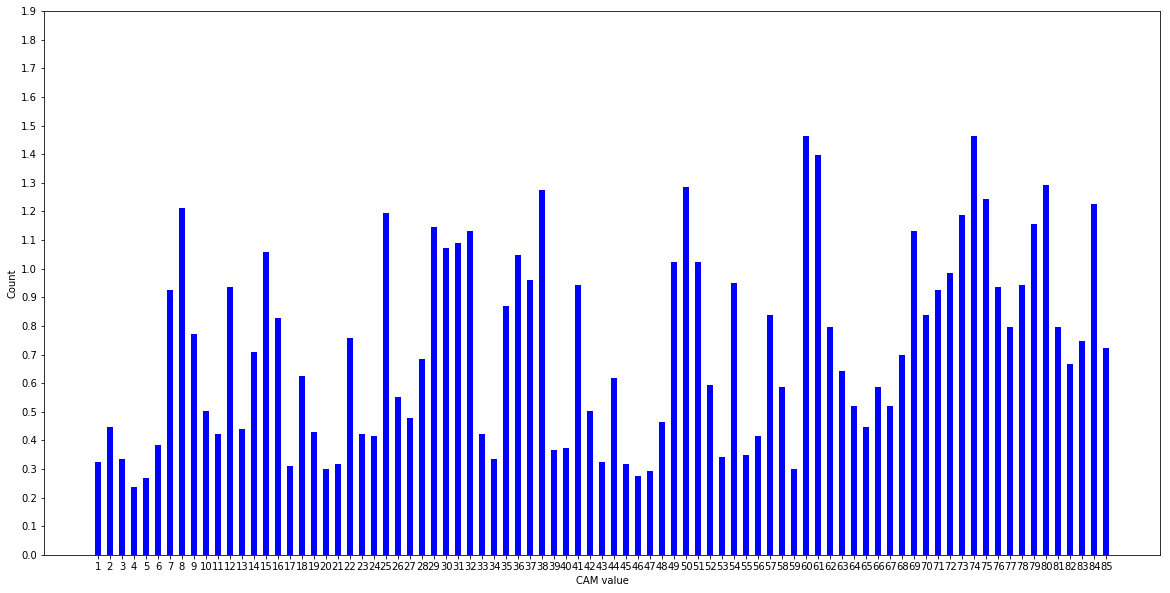

In [6]:
dir_path_save_average_figures = "data/GRAPHSUM"+ str(threshold) + dataset_type + "Control_EtOH/figures/CAM_1D_vector_1/CAM_average"
dir_path_save_average_files = "data/GRAPHSUM"+ str(threshold) + dataset_type + "Control_EtOH/files/CAM_1D_vector_1/CAM_average"
total_nr_examples_good = total_nr_examples_per_folder[folders[0]] 
total_nr_examples_wrong = total_nr_examples_per_folder[folders[1]]
for key, values in average_folder_dict.items():
    print(key)
    nodes_acc_total_low = {k:0 for k in range(1, 86)}
    nodes_acc_total_high = {k:0 for k in range(1, 86)}
    for j in range(0, 11):
        nodes_acc = {k:0 for k in range(1, 86)}
        for i in range(0, 10):
            nodes_dict = values[i][j]
            for node_key, node_value in nodes_dict.items():
                nodes_acc[node_key] += node_value
        if j < 6:
            for node_key, node_value in nodes_acc.items():
                nodes_acc_total_low[node_key] += node_value  
        else:
            for node_key, node_value in nodes_acc.items():
                nodes_acc_total_high[node_key] += node_value
        filename = "nodes_count_average_relative_" + str(round((j * 0.1),1)) + ".png"
        path_to_save = os.path.join(dir_path_save_average_figures, key, filename)
#         if "Good" in key:
#             plot_final_histogram(path_to_save, nodes_acc, total_nr_examples_good)
#         else:
#             plot_final_histogram(path_to_save, nodes_acc, total_nr_examples_wrong)
        plot_final_histogram(path_to_save, nodes_acc, total_nr_examples_per_folder[key])
        dict_to_write = np.empty((85,2))
        k = 0
        for node_key, node_value in nodes_acc.items():
            dict_to_write[k, :] = (node_key, node_value/total_nr_examples_per_folder[key]) 
            k += 1
        filename = "nodes_count_average_relative_" + str(round((j * 0.1),1)) + ".txt"
        path_to_save = os.path.join(dir_path_save_average_files, key, filename)
        np.savetxt(path_to_save, dict_to_write, "%f")
    filename = "nodes_count_average_relative_low.png"
    path_to_save = os.path.join(dir_path_save_average_figures, key, filename)
#     if "Good" in key:
#             plot_final_histogram(path_to_save, nodes_acc_total_low, total_nr_examples_good)
#     else:
#             plot_final_histogram(path_to_save, nodes_acc_total_low, total_nr_examples_wrong)
    plot_final_histogram(path_to_save, nodes_acc_total_low, total_nr_examples_per_folder[key])
    dict_to_write = np.empty((85,2))
    k = 0
    for node_key, node_value in nodes_acc_total_low.items():
        dict_to_write[k, :] = (node_key, node_value/total_nr_examples_per_folder[key]) 
        k += 1
    filename = "nodes_count_average_relative_low.txt"
    path_to_save = os.path.join(dir_path_save_average_files, key, filename)
    np.savetxt(path_to_save, dict_to_write, "%f")
    filename = "nodes_count_average_relative_high.png"
    path_to_save = os.path.join(dir_path_save_average_figures, key, filename)
#     if "Good" in key:
#             plot_final_histogram(path_to_save, nodes_acc_total_high, total_nr_examples_good)
#     else:
#             plot_final_histogram(path_to_save, nodes_acc_total_high, total_nr_examples_wrong)
    plot_final_histogram(path_to_save, nodes_acc_total_high, total_nr_examples_per_folder[key])
    dict_to_write = np.empty((85,2))
    k = 0
    for node_key, node_value in nodes_acc_total_high.items():
        dict_to_write[k, :] = (node_key, node_value/total_nr_examples_per_folder[key]) 
        k += 1
    filename = "nodes_count_average_relative_high.txt"
    path_to_save = os.path.join(dir_path_save_average_files, key, filename)
    np.savetxt(path_to_save, dict_to_write, "%f")

In [7]:
total_nr_examples_per_folder[folders[0]]

119

In [8]:
total_nr_examples_per_folder[folders[1]]

123